# A simple example of imaginary lensing estimator modules

In [1]:
# external
import numpy as np
from matplotlib.pyplot import *
# from cmblensplus/wrap/
import basic
import curvedsky as cs
# from cmblensplus/utils/
import plottools as pl
import cmb as CMB

First define parameters

In [2]:
Tcmb  = 2.726e6    # CMB temperature
Lmax  = 3000       # maximum multipole of output normalization
rlmin, rlmax = 100, Lmax  # CMB multipole range for reconstruction
#lbmin = 500
L = np.linspace(0,Lmax,Lmax+1)
Lfac = (L*(L+1.))**2/(2*np.pi)
beta = .35

In [4]:
ucl = CMB.read_camb_cls('../data/local/cosmo2017_10K_acc3_scalCls.dat',output='array')[:,:Lmax+1]
lcl = CMB.read_camb_cls('../data/local/cosmo2017_10K_acc3_lensedCls.dat',ftype='lens',output='array')[:,:Lmax+1]
nl  = np.zeros((4,rlmax+1))
ac2rad = np.pi/10800.
sig = 70.
nl[0,:] = .5*(sig*ac2rad/Tcmb)**2*np.exp(L*(L+1)*(7.*ac2rad)**2/8./np.log(2.))
nl[1,:] = 2*nl[0,:]
nl[2,:] = 2*nl[0,:]
ocl = lcl + nl
oclHM = lcl + nl*2

In [5]:
Ag, Ac = {}, {}
Ag['TE'], Ac['TE'] = cs.norm_imag.qte('lens',Lmax,rlmin,rlmax,lcl[3,:],ocl[0,:],ocl[1,:])
Ag['EE'], Ac['EE'] = cs.norm_imag.qee('lens',Lmax,rlmin,rlmax,lcl[1,:],ocl[1,:])
Ag['TB'], Ac['TB'] = cs.norm_imag.qtb('lens',Lmax,rlmin,rlmax,lcl[3,:],ocl[0,:],ocl[2,:])
Ag['EB'], Ac['EB'] = cs.norm_imag.qeb('lens',Lmax,rlmin,rlmax,lcl[1,:],ocl[1,:],ocl[2,:])
Ag['BB'], Ac['BB'] = cs.norm_imag.qbb('lens',Lmax,rlmin,rlmax,lcl[1,:],ocl[2,:])

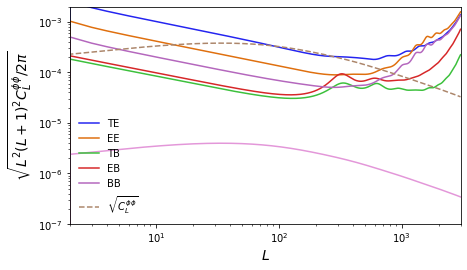

In [6]:
# plot normalization (gradient)
pl.plot_1dstyle(fsize=[7,4],xmin=2,xmax=Lmax,xlog=True,ymin=1e-7,ymax=2e-3,ylog=True,ylab=r'$\sqrt{L^2(L+1)^2C^{\phi\phi}_L/2\pi}$')
for qi, q in enumerate(['TE','EE','TB','EB','BB']):
    plot(L,np.sqrt(Lfac*Ag[q]/(2*L+1)),label=q)
plot(L,np.sqrt(Lfac*ucl[3]),ls='--',label=r'$\sqrt{C_L^{\phi\phi}}$')
plot(L,np.sqrt(Lfac*ucl[3])*np.pi/180.*0.6)
legend()

In [7]:
corr = (0.4-0.9)/(2000.)*L + 0.9
Nl = 1./(1./Ag['EB']+1./Ag['TB']+1./Ag['BB']+1./Ag['EE']+1./Ag['TE'])
SN = (2*L+1.)*ucl[3]/Nl * corr**2
sn = np.pi/180. * np.sqrt( np.sum(SN[2:]) )
print(beta*sn)

1.1527118964416485


/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
Nl = 1./(1./Ag['EB']+1./Ag['TB']+1./Ag['BB']+1./Ag['EE']+1./Ag['TE'])
SN = (L+.5)*ucl[3]**2/Nl**2
sn = (np.pi/180.)**2 * np.sqrt( np.sum(SN[2:]) )
print(beta**2*sn)

0.004853789613523585


/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [9]:
SN = (2*L+1.)*(lcl[1,:]-lcl[2,:])**2/( oclHM[1,:]*oclHM[2,:] )
sn = np.pi/180. * 2. * np.sqrt( np.sum(SN[rlmin+1:]) )
print(beta*sn)

3.725292259450648


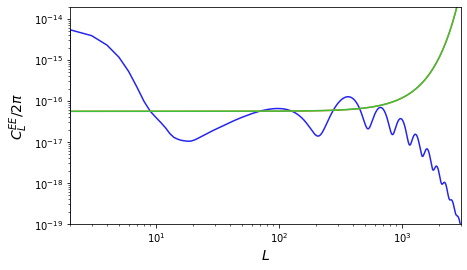

In [10]:
pl.plot_1dstyle(fsize=[7,4],xmin=2,xmax=Lmax,xlog=True,ymin=1e-19,ymax=2e-14,ylog=True,ylab=r'$C^{EE}_L/2\pi$')
plot(lcl[1,:])
plot(nl[1,:])
plot(ocl[2,:])

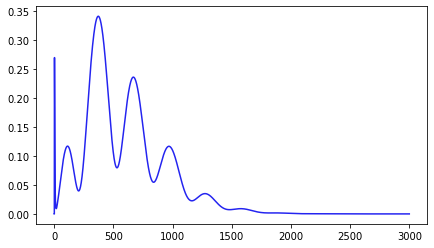

In [11]:
plot(SN**0.5*np.pi/180.)